# Anomaly detection using Self Organizing Maps

This notebook gives a quick example on how to use the Self Organizing Maps anomaly detector in this repository.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d import Axes3D

from som_anomaly_detector.anomaly_detection import AnomalyDetection

Initialize the Anomaly detector with some arbitrary parameters.

In [2]:
anomaly_detector = AnomalyDetection((10, 10), 3, 8, 0.001, 2, 0.001, 10, 3)

Lets generate some training and some evaluation data. We'll take the training data from a mixture distribution. The evaluation set consists of 100 points taken from this mixture and 30 anomalies/noise.

In [3]:
training = np.random.rand(1000, 3)
training = np.vstack((training, np.random.rand(1000, 3) + 10))

outliers = np.random.rand(15, 3) * 4 - 2
outliers_2 = np.random.rand(15, 3) * 4 + 8
evaluation = np.vstack((outliers, outliers_2, np.random.rand(50, 3), np.random.rand(50, 3) + 10))

## Visualize the training data and the evaluation set
The training data only contains "non-anomalous" samples, whereas the evaluation data contains anomalies (the red points).

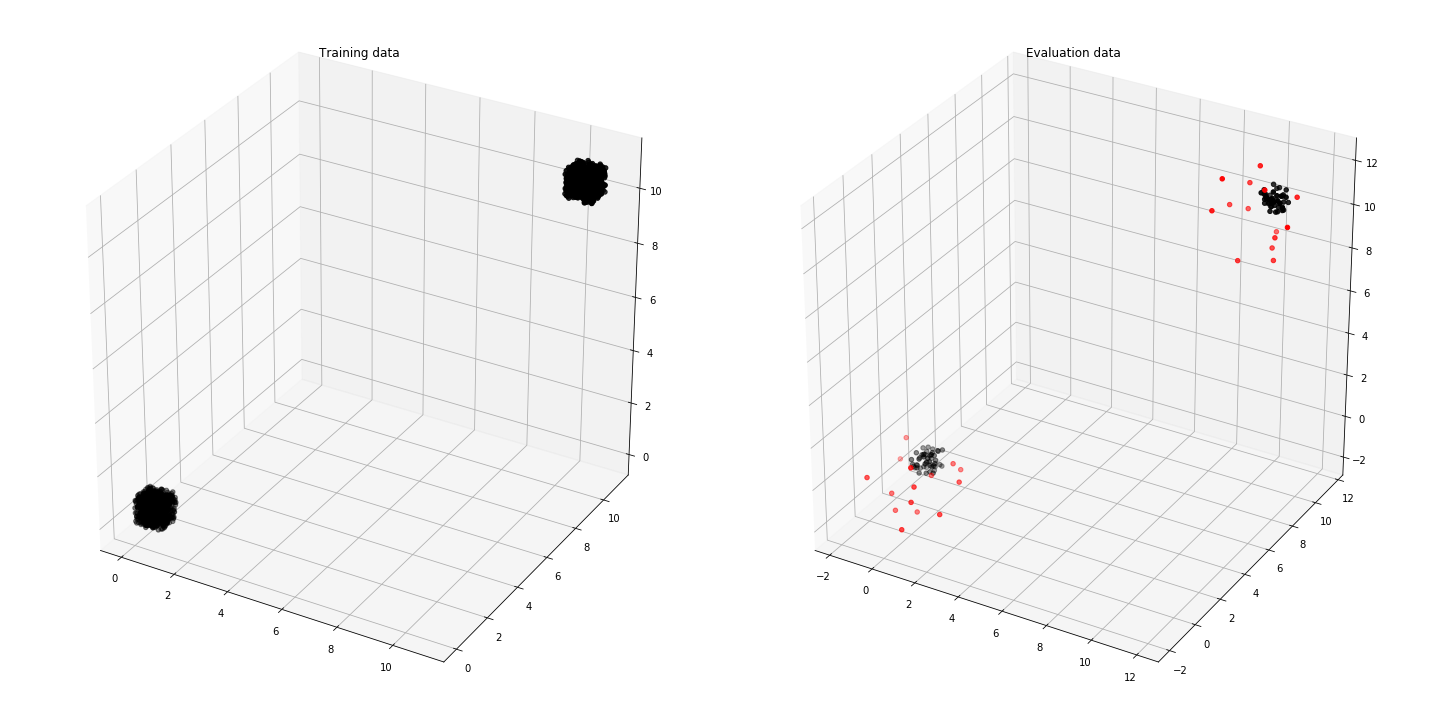

In [23]:

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(training[:, 0], training[:, 1], training[:, 2], c='black')
ax.set_title('Training data', loc='center')


ax = fig.add_subplot(122, projection='3d')
ax.scatter(evaluation[0:29, 0], evaluation[0:29, 1], evaluation[0:29, 2], c='red')
ax.scatter(evaluation[30:, 0], evaluation[30:, 1], evaluation[30:, 2], c='black')
ax.set_title('Evaluation data')

plt.tight_layout()

# Apply the anomaly detector
Apply the anomaly detector and compute the anomaly metrics on the evaluation data.

In [25]:
N_ITER_TO_FIT = 5000

anomaly_detector.fit(training, N_ITER_TO_FIT)
anomaly_metrics = anomaly_detector.evaluate(evaluation)

/home/floris/development/som-anomaly-detector/som_anomaly_detector/kohonen_som.py:132: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  bmu_distance = bmu_distance[slc]


The anomaly metric will be peaked around zero (non-anomalous samples). The bump at higher values is being caused by anomalies that can be filtered out.

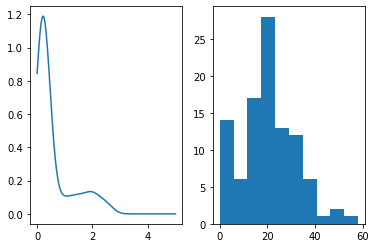

In [27]:
plt.subplot(121)
density = gaussian_kde(anomaly_metrics)
xs = np.linspace(0, 5, 200)
plt.plot(xs, density(xs))

plt.subplot(122)
plt.hist(anomaly_detector.bmu_counts)

# Visualize the detected anomalies
We'll create two plots, one plot showing the true anomalies in red and one plot showing the detected anomalies in green.

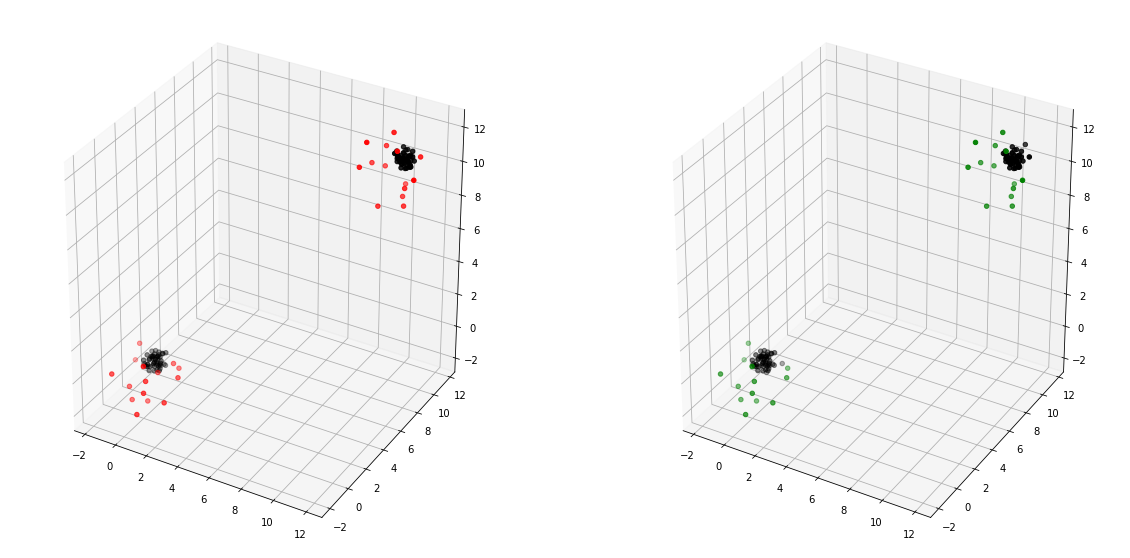

In [29]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(evaluation[0:29, 0], evaluation[0:29, 1], evaluation[0:29, 2], c='red')
ax.scatter(evaluation[30:, 0], evaluation[30:, 1], evaluation[30:, 2], c='black')

sec = fig.add_subplot(122, sharex=ax, sharey=ax, projection='3d')
selector = anomaly_metrics > 1
sec.scatter(evaluation[selector, 0], evaluation[selector, 1], evaluation[selector, 2], c='green')
sec.scatter(evaluation[~selector, 0], evaluation[~selector, 1], evaluation[~selector, 2], c='black')